In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
image_size = (150, 150)
batch_size = 32

In [7]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/clothing-dataset-small-master/train",
                                                                   seed=123, 
                                                                   batch_size=batch_size, 
                                                                   image_size=image_size,
                                                                   subset="training",
                                                                   validation_split=0.2)

Found 3429 files belonging to 10 classes.
Using 2744 files for training.


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:

test_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/clothing-dataset-small-master/train", 
                                                                   seed=123, 
                                                                   batch_size=batch_size, 
                                                                   image_size=image_size,
                                                                   subset="validation",
                                                                   validation_split=0.2)

Found 3429 files belonging to 10 classes.
Using 685 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['dress', 'hat', 'longsleeve', 'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']


In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [13]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [15]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(150,150,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [30]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(150, 150, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10,name='outputs')
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [32]:
history = model.fit(
  train_ds,
  validation_data=test_ds,
        epochs=20,
)

Epoch 1/20
86/86 [==============================] - 79s 900ms/step - loss: 2.0983 - accuracy: 0.2802 - val_loss: 1.9182 - val_accuracy: 0.3679
Epoch 2/20
86/86 [==============================] - 82s 950ms/step - loss: 1.7499 - accuracy: 0.4144 - val_loss: 1.5490 - val_accuracy: 0.4672
Epoch 3/20
86/86 [==============================] - 81s 929ms/step - loss: 1.5472 - accuracy: 0.4778 - val_loss: 1.3612 - val_accuracy: 0.5606
Epoch 4/20
86/86 [==============================] - 82s 943ms/step - loss: 1.4575 - accuracy: 0.5080 - val_loss: 1.2413 - val_accuracy: 0.5927
Epoch 5/20
86/86 [==============================] - 86s 996ms/step - loss: 1.3286 - accuracy: 0.5638 - val_loss: 1.1907 - val_accuracy: 0.6146
Epoch 6/20
86/86 [==============================] - 78s 901ms/step - loss: 1.2583 - accuracy: 0.5926 - val_loss: 1.2300 - val_accuracy: 0.5854
Epoch 7/20
86/86 [==============================] - 78s 904ms/step - loss: 1.1865 - accuracy: 0.6130 - val_loss: 1.1459 - val_accuracy: 0.6146

In [55]:
epochs=20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


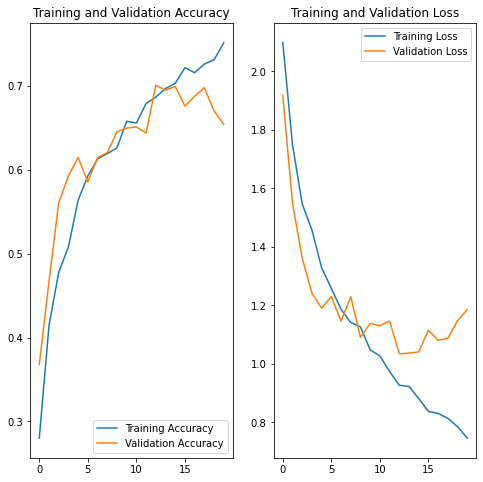

In [56]:


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

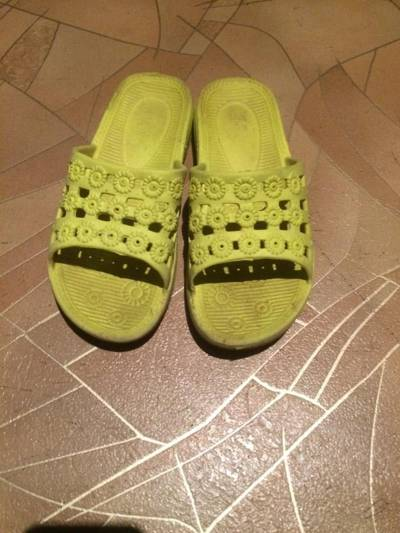

In [63]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/0dd87e47-ca85-4d5c-9fd1-59f5a01eb656.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [64]:
img = tf.keras.utils.load_img(
    '/content/0dd87e47-ca85-4d5c-9fd1-59f5a01eb656.jpg', target_size=(150, 150)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to shoes with a 43.86 percent confidence.
